# Bank Customer Churn Prediction

This project is about Multinational Bank (ABC) Customer Churn prediction. To make the prediction on the data, I decided to used the tree-based machine learning for classification task such as Randomforest, XGboost and LGBM.

The purposes of this project include the following:
1. To identify what factors determine whether the customer stay using the bank service.
2. Comparing the performance between all tree-based models on making a classification model.
3. Identify how each factors affect customer churn

The project process will be done in the following in each section below:

## Import all the necessary library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier #XGboost model
from sklearn.ensemble import RandomForestClassifier #Randomforest model
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score
import shap


import warnings
warnings.filterwarnings('ignore')
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
import plotly.offline as py
py.init_notebook_mode(connected=True)

## Data Exploration

In [3]:
#Import the dataset and explored
bank_df = pd.read_csv("Bank Customer Churn Prediction.csv")
bank_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Identify the dimension of data
bank_df.shape

(10000, 12)

In [5]:
#Looking at the data type within the dataframe
bank_df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [6]:
#Looking at the descriptive statistics summary of the numerical data
bank_df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
#Identify the null within the dataset
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
#Identify unique value within each features
bank_df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

## Data Cleaning and EDA

After we have explore the dataset, it is time to do some exploratory data analysis to see how each feature represent within each dataset and remove some unnecessary features as the following:

Firstly, the customer_id column will be removed because it does not contain any necessary information for predict the customer churn

In [9]:
#Remove the customer_id column
bank_df.drop("customer_id",axis=1,inplace=True)

### Numerical features data analysis

In [10]:
#Drop the categorical data to calculate the mean of each numerical column 
features = bank_df.keys()
features = features.drop(['churn','country','gender'])
bank_df.groupby('churn')[features].mean()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [11]:
#calculate the median of each numerical column 
bank_df.groupby('churn')[features].median()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,
0,653.0,36.0,5.0,92072.68,2.0,1.0,1.0,99645.04
1,646.0,45.0,5.0,109349.29,1.0,1.0,0.0,102460.84


### Churn proportion within the dataset

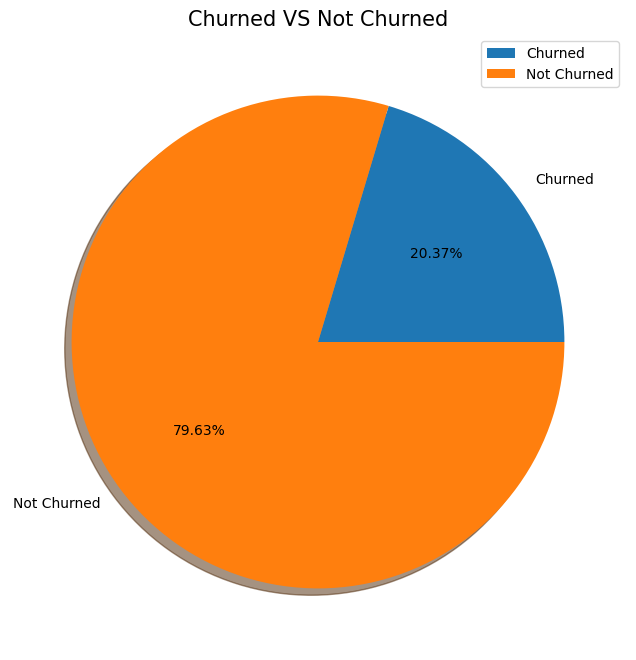

In [12]:
#Display the proportion of the churn within the dataset
sizes = [bank_df.churn[bank_df['churn']==1].count(), bank_df.churn[bank_df['churn']==0].count()]
labels = ['Churned', 'Not Churned']
figure, axes = plt.subplots(figsize=(10, 8))
axes.pie(sizes, labels=labels,shadow=True,autopct = '%1.2f%%')
plt.legend()
plt.title("Churned VS Not Churned", size = 15)
plt.show()

The result show that the dataset churn result is bias toward the not churn

### Churn Rate by different Country

In [13]:
px.histogram(bank_df,x='country', color = 'churn',barmode = 'group')

In [14]:
Churn_french = bank_df.churn[(bank_df.churn == 1) & (bank_df.country == 'France')].count()
French_num = bank_df.churn[bank_df.country=='France'].count()
Prop_french = (Churn_french/French_num) * 100

Churn_spain = bank_df.churn[(bank_df.churn == 1) & (bank_df.country == 'Spain')].count()
Spain_num = bank_df.churn[bank_df.country=='Spain'].count()
Prop_Spain = (Churn_spain/Spain_num) * 100

Churn_german = bank_df.churn[(bank_df.churn == 1) & (bank_df.country == 'Germany')].count()
german_num = bank_df.churn[bank_df.country=='Germany'].count()
Prop_german = (Churn_german/german_num) * 100

print(f'Percentage of Churn in France = {Prop_french}%\nPercentage of Churn in Spain = {Prop_Spain}%\nPercentage of Churn in Germany = {Prop_german}%')

Percentage of Churn in France = 16.15476665337056%
Percentage of Churn in Spain = 16.673395236172787%
Percentage of Churn in Germany = 32.44320446392985%


Based on the visualisation and churn rate, Germany is the most and the least Country that tends to churn.

### Active member VS Churn

In [15]:
px.histogram(bank_df,x='active_member', color = 'churn',barmode = 'group')

Inactive member tend to churn more than the inactive individuals.

### Gender VS Churn

In [16]:
px.histogram(bank_df,x='gender', color = 'churn',barmode = 'group')

Female tends to churn more than churn.

### Credit card vs Churn

In [17]:
px.histogram(bank_df,x='credit_card', color = 'churn',barmode = 'group')

Individual who got credit cards tend to churn.

### Correlation between each numerical variable

Once all the data is being compared, the correlation analysis will be conducted to identify the association between each feature at the following:

<Axes: >

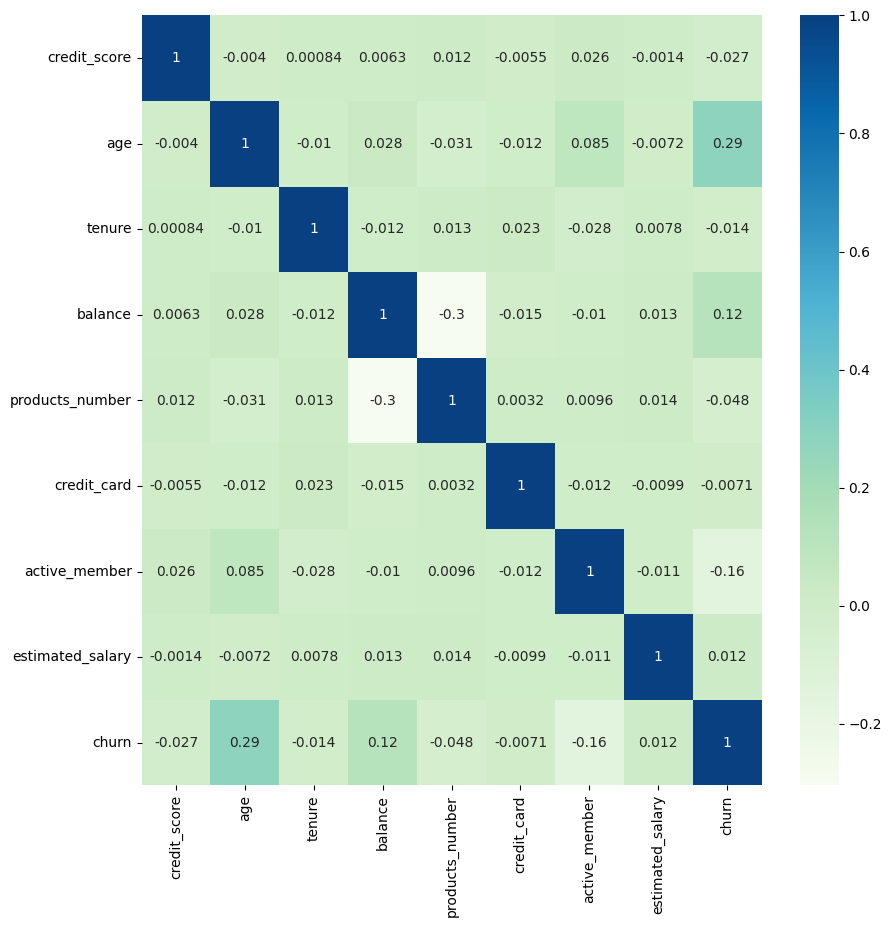

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(data=bank_df[bank_df.keys().drop(['country','gender'])].corr(), annot=True,cmap = "GnBu")

Based on the correlation result, it seems that age, active_member, and balance correlate with the churn. There are not any strong multicolinearity between each features.

Summary:
- Around 20% of the customers have Churned.
- Age has the highest positive correlation and Active_member got the highest negative correlation with the Churned Customers .
- Females have churned more than Males.
- Customers with credit card have churned tend to churn more.The reason may be because credit card influences your spending habits in a negative way.
- People who are active member of bank have churned less than those who aren't.
- Credit Score and Estimated Salary are almost same for both churned and not churned people.
- German is most for churn.

### Model development

Before the model are developed, some of the features need to be transformed to be numerical form so that it can be included within the model training as the following:

In [63]:
#Convering Categorical Features into numerical features using LabelEncoder
bank_df['country'] = LabelEncoder().fit_transform(bank_df['country'])
bank_df['gender'] = LabelEncoder().fit_transform(bank_df['gender'])

In [100]:
#Train/test split the dataset 80-20 for model development
X = bank_df.copy();
X.drop('churn',axis = 1,inplace = True)
y = bank_df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)
scale = StandardScaler()
#X_train = scale.fit_transform(X_train)
#X_test = scale.transform(X_test)

In [101]:
#Due to imbalance dataset now I'm using oversampling technique to improve
smote = SMOTE(random_state=100)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#### Randomforest

In [102]:
rforest = RandomForestClassifier(random_state=100)
rforest.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=100)

In [103]:
# Make prediction on the testing data
y_pred = rforest.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))
print(f"ROC and AUC score = {roc_auc_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1536
           1       0.61      0.54      0.57       464

    accuracy                           0.81      2000
   macro avg       0.74      0.72      0.73      2000
weighted avg       0.81      0.81      0.81      2000

ROC and AUC score = 0.7375461593015578


#### Xgboost

In [104]:
xgb_model = XGBClassifier(random_state=100)
xgb_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [105]:
y_pred = xgb_model.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))
print(f"ROC and AUC score = {roc_auc_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1525
           1       0.61      0.53      0.57       475

    accuracy                           0.81      2000
   macro avg       0.74      0.71      0.72      2000
weighted avg       0.80      0.81      0.80      2000

ROC and AUC score = 0.7356111369249957


#### LGBM

In [106]:
lgbm_model = LGBMClassifier(random_state=100,verbose=0)
lgbm_model.fit(X_train_smote, y_train_smote)

LGBMClassifier(random_state=100, verbose=0)

In [107]:
y_pred = lgbm_model.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))
print(f"ROC and AUC score = {roc_auc_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1514
           1       0.64      0.55      0.59       486

    accuracy                           0.82      2000
   macro avg       0.75      0.72      0.74      2000
weighted avg       0.81      0.82      0.81      2000

ROC and AUC score = 0.7520175588760364


Based on the accuracy, ROC and AUC score, LGBM is the most optimal model for this task.  So in the next step the hyperparameter tuning to identify the most optimal parameter for the model to be generalised.

In [108]:
#Parameter grid for tuning
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

#Re-train the model with different parameter
grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=100, verbose=0),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [109]:
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

Best Hyperparameters:  {'learning_rate': 0.2, 'n_estimators': 200}
Best Accuracy Score:  0.8687843137254901


In [110]:
#Predict the Churn with our new best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred)

print(classification_report(y_pred, y_test))
print("Test ROC AUC Score: ", roc_auc)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1553
           1       0.58      0.53      0.55       447

    accuracy                           0.81      2000
   macro avg       0.72      0.71      0.72      2000
weighted avg       0.80      0.81      0.81      2000

Test ROC AUC Score:  0.7230289061162603


#### Conclusion using SHAP

Once we got the optimal model, SHAP will be used for providing an explanation on how the features affect the how the model predict the churn as the following:

In [111]:
explainer = shap.Explainer(lgbm_model)
shap_values = explainer.shap_values(X_test)

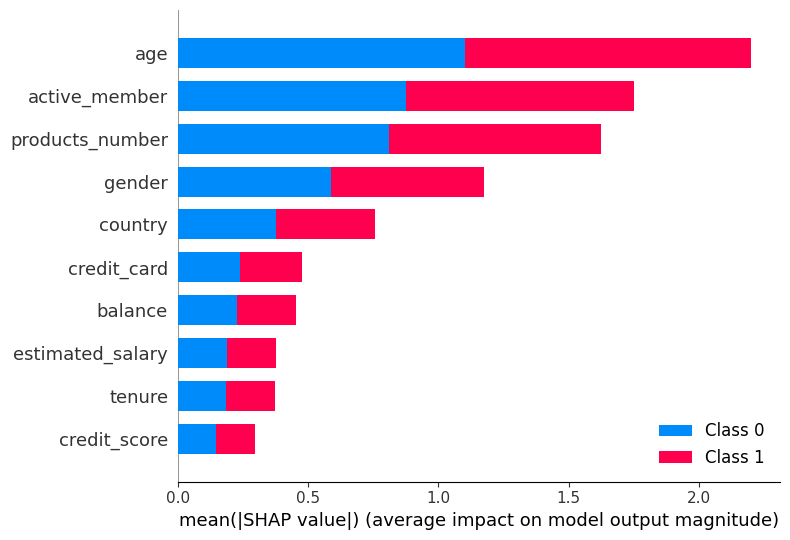

In [112]:
shap.summary_plot(shap_values, X_test)

According to the summary plot Age is the most feature that affect the churn following by active_member, products_number, gender and country. However, we do not know how they affect the churn exactly so we identify how each features maintain individuals to stay using the summary plot for not churn individuals

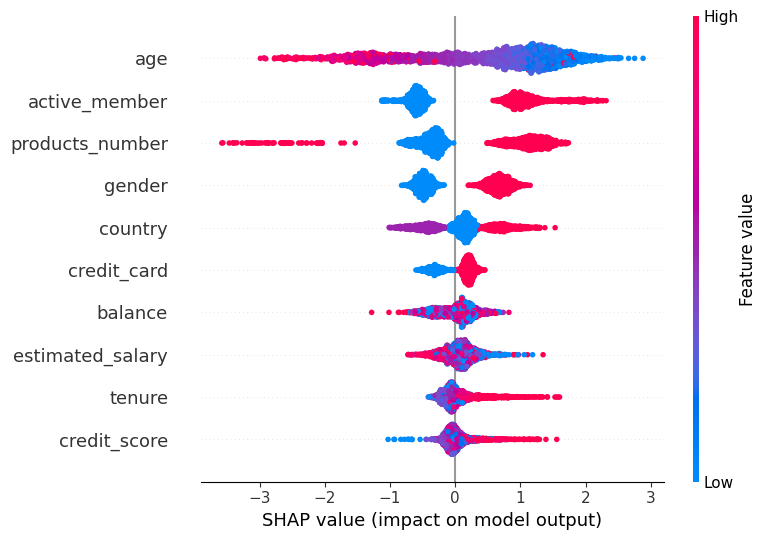

In [113]:
shap.summary_plot(shap_values[0], X_test)

Based on the SHAP summary plot on the not churn individuals, it is likely that products_number is negatively impact the people who is not churn, while the age, active_member and gender affect the unchurn positively. The rest of the fa+eature is not affect the unchurn of people that much. Therefore, in order to make people not stop using the service the bank need to improve individuals number of products_number features, if they want to maintain people to keep using their service.